# Analysing a 360 giving dataset

This notebook takes you step-by-step through analysing a 360 Giving spreadsheet, using python. In particular we'll be using a package called `pandas`, and the `iplotter` package which helps integrate `ChartJS` charts.

The analysis will start by looking at just the dataset itself. We'll look at:

- distribution of grants over time
- the amount of the grants
- which grant programmes have been used
- where organisations have been funded

We can then add additional information by matching the records against charity records, and running keyword searches against the recipients to find the type of organisations and beneficiaries they may have. These keyword searches won't correctly classify every grant, but they give an idea of the spread of activities. Once we know the charity numbers of recipients, we can bring in data like their income or where they work.

Finally, we can also compare the grants dataset against other grantmakers to look at similarities and differences between them using the analysis above.

## Getting python set up

A good way to install python and some of the packages needed for this notebook is to use [Anaconda](https://www.continuum.io/downloads) or [MiniConda](https://conda.io/miniconda.html). The notebook is written using Python 3, though it would be fairly easy to convert it into Python 3.

We then need to install packages. This is done using `pip`. Run the following commands through the command line:

```bash
pip install pandas
pip install matplotlib
pip install requests
```

This will make these packages available for use. Some may already be installed through Anaconda.

It's also worth looking in [virtual environments](https://docs.python.org/3/library/venv.html) to make it easier to manage packages for a single project. 

We then import these packages, and some inbuilt packages, into the notebook to make them available for us to use.

In [3]:
from __future__ import print_function # helps with python 2 compatability
import pandas as pd       # Pandas data analysis library
import requests           # fetch the CSV from the internet

For `matplotlib` for plotting charts we need to set it up to display the charts inline, and then load the library. We'll set it up so that the charts use a particular style (you can change this to one of the [styles shown in this gallery](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html))

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

## Import the data

The data is imported from a CSV file made available by the Cabinet Office. You can find it listed in the [360 Giving data registry](http://www.threesixtygiving.org/data/data-registry/). 

First we'll download the CSV file from the URL provided in the data registry and save it to a CSV file in the same directory.

In [6]:
# URL of the grants data
grant_url = "https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/596322/Community_First_Grants_Database_360Giving.csv"
grant_csv = "community_first_grants.csv" # filename we'll save it to

In [ ]:
response = requests.get(grant_url) # fetch the URL
with open(grant_csv, 'wb') as a:   # open the new file for writing to
    a.write(response.content)      # write the content

The grants data is now downloaded to the directory. We can now import it as a Pandas "DataFrame", which is a table of the data. We'll call this `g` to make it easy to refer to later.

In [87]:
g = pd.read_csv(grant_csv, encoding='latin1')

Anything you leave on its own at the end of an ipython notebook cell gets printed as output, so you can look at a snapshot of the data by just putting `g` in a cell.

In [88]:
g

,Identifier,Funding Org:Identifier,Funding Org:Name,Recipient Org:Identifier,Recipient Org:Name,Recipient Org:Company Number,Recipient Org:Charity Number,Title,Description,Panel,...,Number Of Payments,Beneficiary Location:0:Geographic Code Type,Beneficiary Location:0:Geographic Code,Beneficiary Location:0:Name,Beneficiary Location:1:Geographic Code Type,Beneficiary Location:1:Geographic Code,Beneficiary Location:1:Name,Grant Programme:Code,Grant Programme:Title,Last Modified Date
0,360g-cabinetoffice-CFNMF_1,GB-GOVUK-cabinet_office,Cabinet Office,"360g-cabinetoffice-""kgara""","""KGARA""",NaN,NaN,"Grant awarded to ""KGARA""",new strategy adopted dorset police deal stree...,Bournemouth\East Cliff & Springbourne,...,1,WD,E05002116,East Cliff and Springbourne,LAD,E06000028,Bournemouth,CFNMF,Community First Neighbourhood Match Fund,2016-10-17T15:49:15Z
1,360g-cabinetoffice-CFNMF_2,GB-GOVUK-cabinet_office,Cabinet Office,"360g-cabinetoffice-""loneliness""","""LONELINESS""",NaN,NaN,P.I.C.N.I.C.,group set collating information provided fami...,Sunderland\Pallion,...,1,WD,E05001162,Pallion,LAD,E08000024,Sunderland,CFNMF,Community First Neighbourhood Match Fund,2016-10-17T15:49:15Z
2,360g-cabinetoffice-CFNMF_3,GB-GOVUK-cabinet_office,Cabinet Office,"360g-cabinetoffice-""loneliness""","""LONELINESS""",NaN,NaN,"Grant awarded to ""LONELINESS""",group set collating information provided fami...,Sunderland\Pallion,...,1,WD,E05001162,Pallion,LAD,E08000024,Sunderland,CFNMF,Community First Neighbourhood Match Fund,2016-10-17T15:49:15Z
3,360g-cabinetoffice-CFNMF_4,GB-GOVUK-cabinet_office,Cabinet Office,"360g-cabinetoffice-""pep_kids""","""PEP Kids""",NaN,NaN,Walking in a Winter Wonderland,create performing art children aged yrs singi...,East Riding of Yorkshire\South East Holderness,...,1,WD,E05001707,South East Holderness,LAD,E06000011,East Riding of Yorkshire,CFNMF,Community First Neighbourhood Match Fund,2016-10-17T15:49:15Z
4,360g-cabinetoffice-CFNMF_5,GB-GOVUK-cabinet_office,Cabinet Office,"360g-cabinetoffice-""plant"":_people_linking_at_...","""PLANT"": People Linking at Newtown Together",NaN,NaN,"Grant awarded to ""PLANT"": People Linking at Ne...",works isolated vulnerable elderly residents n...,Stockton on Tees\Newtown,...,1,WD,E05001541,Newtown,LAD,E06000004,Stockton-on-Tees,CFNMF,Community First Neighbourhood Match Fund,2016-10-17T15:49:15Z
5,360g-cabinetoffice-CFNMF_6,GB-GOVUK-cabinet_office,Cabinet Office,"360g-cabinetoffice-""planting_a_seed""","""Planting a Seed""",NaN,NaN,"Grant awarded to ""Planting a Seed""",castle ward welcome gardens buying installing...,East Sussex\Castle,...,1,WD,E05003932,Castle,LAD,E07000062,Hastings,CFNMF,Community First Neighbourhood Match Fund,2016-10-17T15:49:15Z
6,360g-cabinetoffice-CFNMF_7,GB-GOVUK-cabinet_office,Cabinet Office,"360g-cabinetoffice-""pomoc""","""POMOC""",NaN,NaN,"Grant awarded to ""POMOC""",currently provision armley surrounding areas ...,Leeds\Armley,...,1,WD,E05001414,Armley,LAD,E08000035,Leeds,CFNMF,Community First Neighbourhood Match Fund,2016-10-17T15:49:15Z
7,360g-cabinetoffice-CFNMF_8,GB-GOVUK-cabinet_office,Cabinet Office,360g-cabinetoffice-(education_2day)_finsbury_p...,(Education 2Day) Finsbury Park Youth Space,NaN,NaN,"Finsbury park youth and play space ""Cinderella...",will done planned educational visit tolondons...,Islington\Finsbury Park,...,1,WD,E05000371,Finsbury Park,LAD,E09000019,Islington,CFNMF,Community First Neighbourhood Match Fund,2016-10-17T15:49:15Z
8,360g-cabinetoffice-CFNMF_9,GB-GOVUK-cabinet_office,Cabinet Office,360g-cabinetoffice-(kyso)_keem_youth_shout_out,(KYSO) Keem Youth Shout Out,NaN,NaN,Kyso,keem youth shout new youth organisation direc...,Manchester\Moss Side,...,1,WD,E05000710,Moss Side,LAD,E08000003,Manchester,CFNMF,Community First Neighbourhood Match Fund,2016-10-17T15:49:15Z
9,360g-cabinetoffice-CFNMF_10,GB-GOVUK-cabinet_office,Cabinet Office,360g-cabinetoffice-(kyso)_keem_youth_shout_out,(KYSO) Keem Youth Shout Out,NaN,NaN,KYSO,keem youth sho

At the bottom of the table display we see the shape of the dataframe - the number of rows and columns. You can also access this through the `.shape` attribute.

In [89]:
g.shape

(17176, 32)

So we have 17,176 rows across 31 columns.

## Checking and transforming the data

Raw data is not always useful. We need to check the data formats, perhaps making sure that amounts are registered as numbers and dates formatted as dates.

First we can look for duplicate rows, and then drop any. Let's check the Identifier first.

In [90]:
g[g.duplicated("Identifier")]

,Identifier,Funding Org:Identifier,Funding Org:Name,Recipient Org:Identifier,Recipient Org:Name,Recipient Org:Company Number,Recipient Org:Charity Number,Title,Description,Panel,...,Number Of Payments,Beneficiary Location:0:Geographic Code Type,Beneficiary Location:0:Geographic Code,Beneficiary Location:0:Name,Beneficiary Location:1:Geographic Code Type,Beneficiary Location:1:Geographic Code,Beneficiary Location:1:Name,Grant Programme:Code,Grant Programme:Title,Last Modified Date


Pandas adds its own identifier to the datatable, but the grants data comes with an identifier, so we can set that up. Pandas calls this an "index". 

(We could also have done this in the `read_csv` command by adding the parameter `index_col=["Identifier"]`. I've added the `inplace=True` parameter to make sure that the variable itself is changed rather than creating a copy of the dataframe. An alternative to this is running `g = g.set_index("Identifier")`.

In [92]:
g.set_index("Identifier", inplace=True)

Next we check the types of all the columns to see if any need to be changed to reflect the data in them. We particularly want the `Award Date` to be a date field and the `Amount Awarded` to be a number.

In [93]:
for c in g.columns:
    print(c, g[c].dtype)

Funding Org:Identifier object
Funding Org:Name object
Recipient Org:Identifier object
Recipient Org:Name object
Recipient Org:Company Number float64
Recipient Org:Charity Number float64
Title object
Description object
Panel object
Award Date object
Planned Dates:Start Date object
Planned Dates:End Date object
Amount Awarded float64
Currency object
Total Contributions float64
Volunteer Contributions (Hours) float64
Volunteer Contributions Amount float64
Cash Contributions float64
In Kind Contributions float64
Classifications:Title object
Grant Fiscal Year int64
Number Of Payments int64
Beneficiary Location:0:Geographic Code Type object
Beneficiary Location:0:Geographic Code object
Beneficiary Location:0:Name object
Beneficiary Location:1:Geographic Code Type object
Beneficiary Location:1:Geographic Code object
Beneficiary Location:1:Name object
Grant Programme:Code object
Grant Programme:Title object
Last Modified Date object


`Amount Awarded` and other amount fields have been correctly recognised as a number, but the date fields haven't been recognised as dates.

We check the format of these fields by looking at a sample of them, using the `.head()` command.

In [95]:
date_fields = ["Award Date", "Planned Dates:Start Date", "Planned Dates:End Date"]
g[date_fields].head(5)

,Award Date,Planned Dates:Start Date,Planned Dates:End Date
Identifier,,,
360g-cabinetoffice-CFNMF_1,03/09/12,03/09/12,03/09/15
360g-cabinetoffice-CFNMF_2,19/07/13,19/07/13,19/09/13
360g-cabinetoffice-CFNMF_3,06/01/14,06/01/14,06/02/14
360g-cabinetoffice-CFNMF_4,10/12/14,10/12/14,10/02/15
360g-cabinetoffice-CFNMF_5,22/08/12,22/08/12,22/02/13


Looks like all three date fields use the _day/month/year_ format. In python this is represented as `%d/%m/%y`. Going through each field we can use pandas' `.to_datetime()` function to convert them.

`.loc[]` allows us to extract and modify a "series" (column) within the dataframe. 

In [96]:
for df in date_fields:
    g.loc[:,df] = pd.to_datetime( g.loc[:,df], format="%d/%m/%y" )

Check that the columns are in the right format by repeating the command from above.

In [97]:
g[date_fields].head(5)

,Award Date,Planned Dates:Start Date,Planned Dates:End Date
Identifier,,,
360g-cabinetoffice-CFNMF_1,2012-09-03,2012-09-03,2015-09-03
360g-cabinetoffice-CFNMF_2,2013-07-19,2013-07-19,2013-09-19
360g-cabinetoffice-CFNMF_3,2014-01-06,2014-01-06,2014-02-06
360g-cabinetoffice-CFNMF_4,2014-12-10,2014-12-10,2015-02-10
360g-cabinetoffice-CFNMF_5,2012-08-22,2012-08-22,2013-02-22


## Basic analysis

We start the analysis by looking at the number of grants per year. We can first look at this in a view of the dataframe.

In [98]:
g["Award Date"].dt.year.value_counts().sort_index()

2012    4058
2013    4888
2014    6336
2015    1894
Name: Award Date, dtype: int64

In [99]:
g["Award Date"].dt.year.value_counts().sort_index().sum()

17176

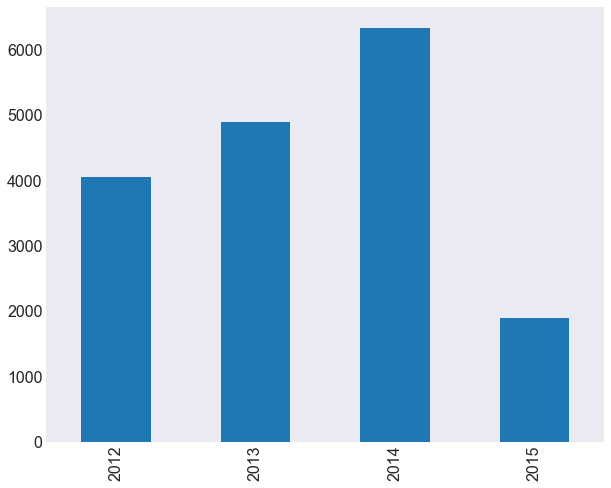

In [100]:
g["Award Date"].dt.year.value_counts().sort_index().plot(kind="bar", figsize=(10,8), fontsize=16)

Then look at the total amount awarded by year.

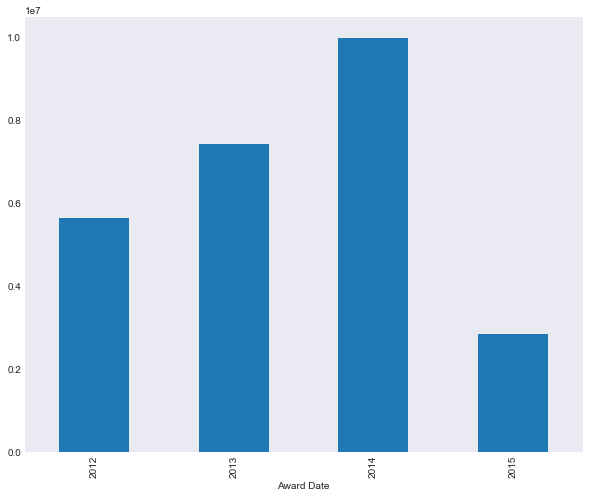

In [101]:
g.groupby(g["Award Date"].dt.year).sum()["Amount Awarded"].plot(kind="bar", figsize=(10,8))

This shows a incline in the amount awarded by year, leading up to 2014. 2015 may not be a complete year, so we can check this by looking at the maximum date available.

In [18]:
g["Award Date"].max()

Timestamp('2015-06-26 00:00:00')

In [19]:
g["Award Date"].min()

Timestamp('2012-02-06 00:00:00')

This confirms that the latest date is in June 2015, so this is an incomplete year. There is a field in the table called `Grant Fiscal Year` which may provide a better base to use. Let's check it using a crosstab.

In [24]:
pd.crosstab(g["Award Date"].dt.year, g["Grant Fiscal Year"], margins=True)

Grant Fiscal Year,2011,2012,2013,2014,2015,All
Award Date,,,,,,
2012,8,4050,0,0,0,4058
2013,0,1336,3549,2,1,4888
2014,0,0,1387,4947,2,6336
2015,0,0,0,1866,28,1894
All,8,5386,4936,6815,31,17176


We can also check the start and end dates of the fiscal year.

In [22]:
g.groupby(g["Grant Fiscal Year"])["Award Date"].agg(["min","max"])

,min,max
Grant Fiscal Year,,
2011,2012-02-13,2012-04-01
2012,2012-02-06,2013-10-01
2013,2013-02-08,2014-08-09
2014,2013-09-01,2015-03-25
2015,2013-04-02,2015-06-26


This looks odd - the years don't seem to align. But we can look at a crosstab to see when the bulk of rows appear in each fiscal year. This suggests that the years are decided based on the end of March.

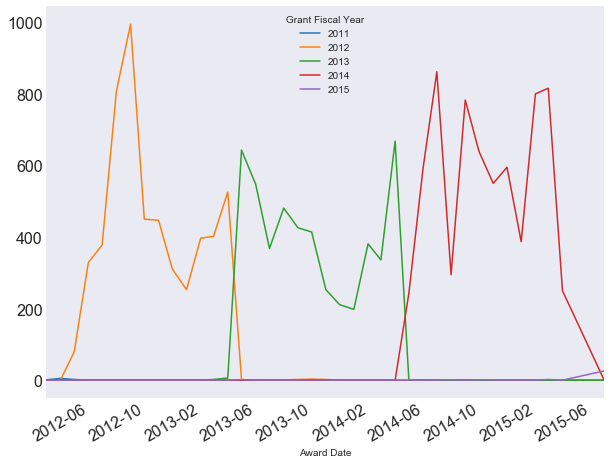

In [39]:
fyears = g.groupby([pd.Grouper(key="Award Date", freq="M"), "Grant Fiscal Year"]).size().unstack().fillna(0)
fyears.plot.line(figsize=(10,8), fontsize=16)

It looks like this gives a better grouping of the grants. Let's re-run our analysis, this time looking at the average size of the grant.

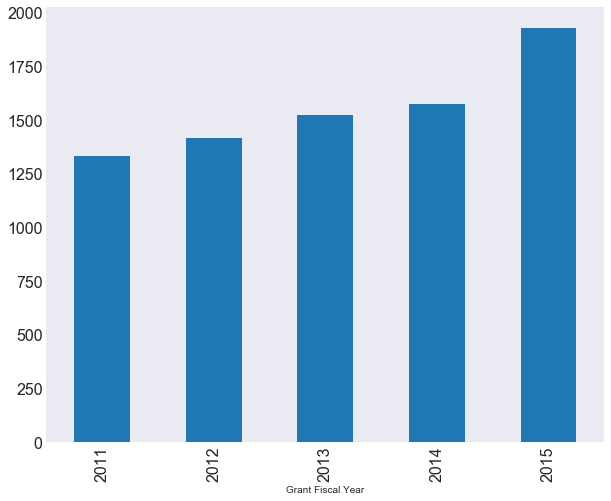

In [78]:
g.groupby(g["Grant Fiscal Year"]).mean()["Amount Awarded"].plot(kind="bar", figsize=(10,8), fontsize=16)

This shows grant size increasing gradually over the years, although the 2011 and 2015 bars is based on a small number of grants.

It's fairly common for datasets to contain outliers that can distort our analysis. A good way to check for these is through a box plot. This shows the median, upper and lower quartiles of the data (the grants that are 25%, 50% and 75% along if ordered by amount).

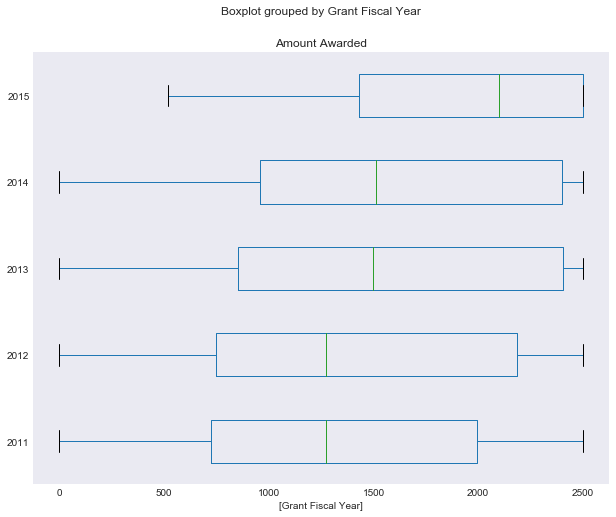

In [21]:
g[["Amount Awarded","Grant Fiscal Year"]].boxplot(by="Grant Fiscal Year", vert=False, grid=False, figsize=(10,8))

In [74]:
g.groupby(g["Grant Fiscal Year"]).median()["Amount Awarded"]

Grant Fiscal Year
2011    1272.0
2012    1274.5
2013    1500.0
2014    1514.0
2015    2100.0
Name: Amount Awarded, dtype: float64

In [75]:
g.median()["Amount Awarded"]

1500.0

In [77]:
g.mean()["Amount Awarded"]

1509.442664182581

This shows that there aren't large outliers at the top end - no grants are larger than £2,500. But at the smaller end the minimum grant size is £0. These grants are worth looking at as they could affect the result. 

Let's take a look at the dataset to see how many grants there are less than £100.

In [22]:
g[g["Amount Awarded"] < 100]["Amount Awarded"].value_counts()

0.00     32
41.62     1
92.42     1
65.00     1
75.00     1
Name: Amount Awarded, dtype: int64

This shows there are 32 payments of £0, with another four less than £100. A histogram of the amounts awarded will also give a good view of the distribution of the amounts.

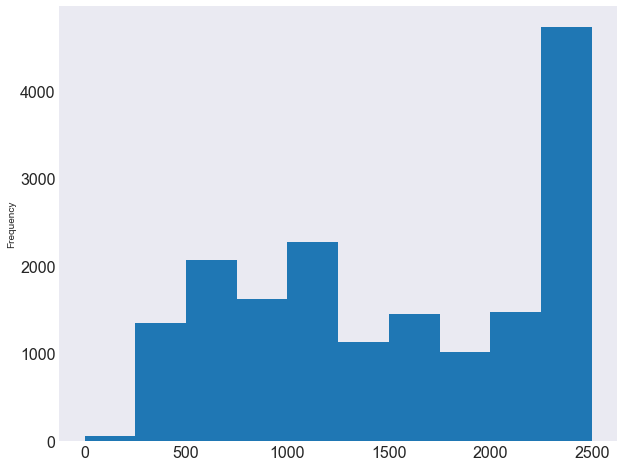

In [73]:
g["Amount Awarded"].plot(kind="hist", figsize=(10,8), fontsize=16)

This shows that although the median is around £1,200 and the mean is £1,500, there are a large number of grants between £2,250 and £2,500. The next cell shows the most popular single amounts.

In [24]:
g["Amount Awarded"].value_counts().head(10)

2500.0    3278
1000.0    1171
500.0      788
2000.0     748
1500.0     655
250.0      278
750.0      256
600.0      218
1200.0     202
800.0      198
Name: Amount Awarded, dtype: int64

So we can see that over 3,000 grants were made for the maximum amount of £2,500.

In [69]:
print( "{:,.0f}".format(g["Amount Awarded"].sum()) )

25,926,187


In [70]:
g.groupby(g["Grant Fiscal Year"]).sum()["Amount Awarded"]

Grant Fiscal Year
2011       10663.00
2012     7621664.83
2013     7517763.87
2014    10716298.52
2015       59796.98
Name: Amount Awarded, dtype: float64

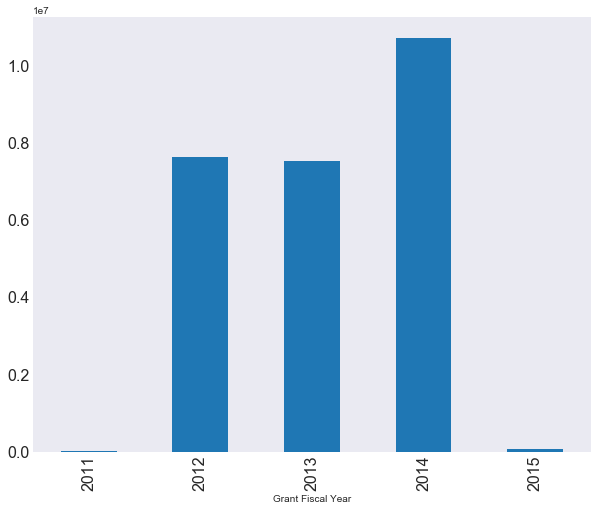

In [72]:
g.groupby(g["Grant Fiscal Year"]).sum()["Amount Awarded"].plot(kind="bar", figsize=(10,8), fontsize=16)

The total amount awarded by the fund was £25.9 million. This is broken down to £7.6 million awarded in 2012, £7.5 million in 2013 and £10.7 million in 2014.

## Beneficiary location

Turning to the geographical distribution of grants, we can use the "Beneficiary Location" fields to examine the data. Let's use the `Geographic Code Type` field to check what types of geography is available. 

In [35]:
g.groupby(["Beneficiary Location:0:Geographic Code Type", "Beneficiary Location:1:Geographic Code Type"]).size()

Beneficiary Location:0:Geographic Code Type  Beneficiary Location:1:Geographic Code Type
WD                                           LAD                                            17176
dtype: int64

This shows that `Beneficiary Location:0` gives _Ward_ information, while `Beneficiary Location:1` is _Local Authority District_ level data. Lets use local authority to see the spread of the grants around the country.

In [36]:
g["Beneficiary Location:1:Name"].value_counts()

Birmingham                     1139
Leeds                           855
Sheffield                       712
Bradford                        517
Sandwell                        514
Manchester                      479
Kingston upon Hull, City of     467
Walsall                         409
Liverpool                       397
Rotherham                       381
Barnsley                        376
Doncaster                       365
Kirklees                        364
Wolverhampton                   340
Dudley                          329
Sunderland                      271
Croydon                         256
Stockport                       248
Wirral                          241
Rochdale                        238
Nottingham                      231
Bristol, City of                227
Derby                           224
Tameside                        206
North East Lincolnshire         195
Salford                         185
Calderdale                      183
Coventry                    

### Compare to index of multiple deprivation

This is a list of all local authorities along with the number of grants made. It would be useful to be able to group these areas though, to see how the patterns change across geography.

Let's download another dataset to give us another dimension to compare. We're going to download the English Indices of Multiple Deprivation from the [Open Data Communities](http://opendatacommunities.org/data/societal-wellbeing/imd/indicesbyla) site.

In [27]:
imd_url = "http://opendatacommunities.org/downloads/cube-table?uri=http%3A%2F%2Fopendatacommunities.org%2Fdata%2Fsocietal-wellbeing%2Fimd%2Findicesbyla"
imd_data = requests.get(imd_url)
with open("imd.csv", "wb") as imdfile:
    imdfile.write(imd_data.content)

In [28]:
imd_data = pd.read_csv("imd.csv")
imd_data.shape

(22168, 6)

Let's use the "Rank of average score" to determine how deprived each local authority is. We'll extract just that data from the dataset to get a single rank, and then put those ranks into deciles. The lower ranked areas are the more deprived.

In [29]:
imd_rank = imd_data[(imd_data["Measurement"]=="Rank of average score") 
         & (imd_data["Indices of Deprivation"]=="a. Index of Multiple Deprivation (IMD)")]\
        [["GeographyCode", "Value"]].set_index("GeographyCode")["Value"]
imd_rank = pd.qcut(imd_rank, 10)
imd_rank = imd_rank.cat.rename_categories(range(0,10))
imd_rank.name = "IMD Rank"
imd_rank.sort_values()

GeographyCode
E07000120    0
E08000032    0
E07000062    0
E06000021    0
E06000018    0
E06000016    0
E07000114    0
E07000117    0
E09000002    0
E07000145    0
E06000012    0
E07000027    0
E06000010    0
E06000009    0
E09000030    0
E09000025    0
E06000008    0
E06000001    0
E06000002    0
E09000019    0
E06000006    0
E09000014    0
E08000031    0
E08000030    0
E09000012    0
E08000012    0
E08000003    0
E08000005    0
E08000006    0
E08000028    0
            ..
E07000131    9
E07000217    9
E07000216    9
E07000176    9
E07000227    9
E07000085    9
E07000155    9
E07000087    9
E07000006    9
E07000240    9
E07000077    9
E07000005    9
E07000089    9
E07000094    9
E07000068    9
E07000102    9
E07000049    9
E06000040    9
E06000041    9
E09000027    9
E07000181    9
E07000086    9
E07000179    9
E07000012    9
E07000207    9
E07000208    9
E07000209    9
E07000210    9
E07000214    9
E07000180    9
Name: IMD Rank, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 

We can then add this column to the main dataframe by matching on the `Beneficiary Location:1:Geographic Code` field.

In [30]:
imd_merge = g.merge(pd.DataFrame(imd_rank), left_on="Beneficiary Location:1:Geographic Code", right_index=True)

This allows us to see the distribution of grants by depriviation. If the grants were evenly spread throughout areas with no preference for more or less deprived areas, we would expect to see an even distribution across all ten deciles.

First we can look at the amount awarded by decile, which the table and chart show is skewed towards more deprived areas (0 is the most deprived).

In [80]:
imd_merge.groupby("IMD Rank").sum()["Amount Awarded"].sort_index() / g.sum()["Amount Awarded"]

IMD Rank
0    0.386643
1    0.255894
2    0.170605
3    0.076737
4    0.050814
5    0.029771
6    0.016675
7    0.003549
8    0.004062
9    0.002769
Name: Amount Awarded, dtype: float64

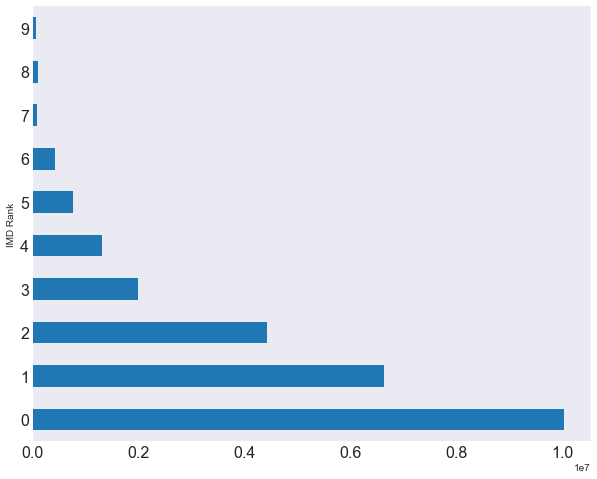

In [79]:
imd_merge.groupby("IMD Rank").sum()["Amount Awarded"].sort_index().plot(kind="barh", figsize=(10,8), fontsize=16)

This also holds true if looking at the number of grants made by IMD decile.

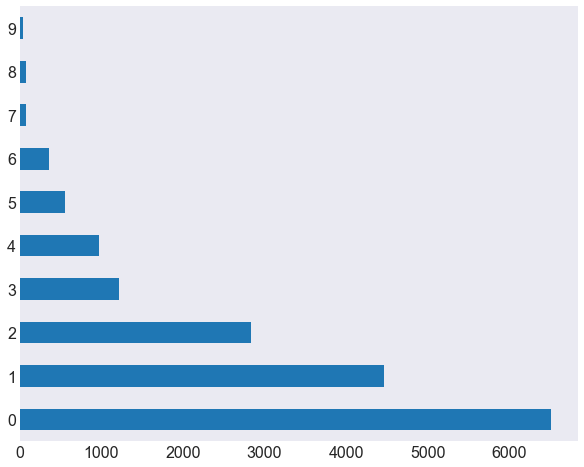

In [58]:
imd_merge["IMD Rank"].value_counts().sort_index().plot(kind="barh", figsize=(10,8), fontsize=16)

If looking at the distribution of grant amounts by IMD, there isn't a huge variation, except that the four most deprived areas do have a higher median amount awarded.

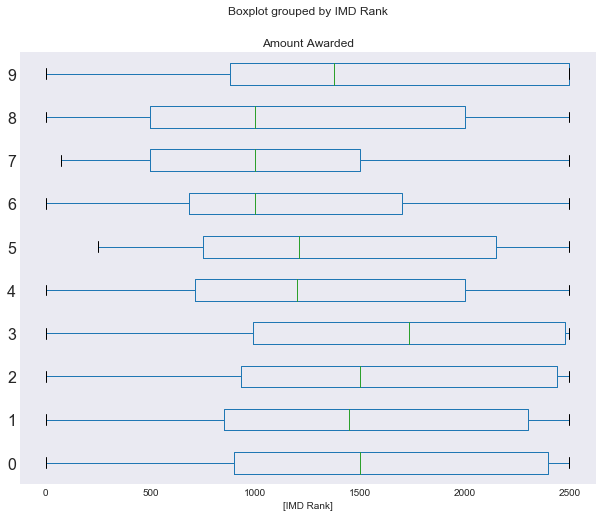

In [55]:
imd_merge[["Amount Awarded","IMD Rank"]].boxplot(by="IMD Rank", vert=False, grid=False, figsize=(10,8), fontsize=16)

## Merging with charity data

This data doesn't include a charity number, which makes it more difficult to match with charity data. I've put together a separate file which attempts to match the recipient organisations to registered charities, and brings in some details.

There are a number of caveats to this exercise. Matching can be difficult - organisations use lots of different names and it isn't always easy to correctly identify the right match. Some matches are missed because of this - "false negatives" - and some are incorrectly matched to another organisation - "false postives". The Community First programme was open to smaller unregistered organisations, so we wouldn't expect all recipients to have a charity number.

Through manually matching organisations I've identified around 1,400 of the 17,000 grants to a charity number. This would suggest around 10% of grants go to registered charities, although the real figure could be higher than this.

We can load this data from the "matches_details.csv" spreadsheet. This includes the charity number matched to a recipient, plus two additional pieces of information:

- their latest income (in pounds)
- the categories they have been classified into (beneficiaries, services provided & theme)

In [126]:
charities = pd.read_csv("matches_details.csv")
charities.drop_duplicates(keep="first", inplace=True)
charities.set_index("Recipient Org:Identifier", inplace=True)
charities

,Recipient Org:Charity Number,income,GENERAL CHARITABLE PURPOSES,EDUCATION/TRAINING,THE ADVANCEMENT OF HEALTH OR SAVING OF LIVES,DISABILITY,THE PREVENTION OR RELIEF OF POVERTY,OVERSEAS AID/FAMINE RELIEF,ACCOMMODATION/HOUSING,RELIGIOUS ACTIVITIES,...,MAKES GRANTS TO INDIVIDUALS,MAKES GRANTS TO ORGANISATIONS,PROVIDES OTHER FINANCE,PROVIDES HUMAN RESOURCES,PROVIDES BUILDINGS/FACILITIES/OPEN SPACE,PROVIDES SERVICES,PROVIDES ADVOCACY/ADVICE/INFORMATION,SPONSORS OR UNDERTAKES RESEARCH,ACTS AS AN UMBRELLA OR RESOURCE BODY,OTHER CHARITABLE ACTIVITIES
Recipient Org:Identifier,,,,,,,,,,,,,,,,,,,,,
360g-cabinetoffice-100th_mackworth_scout_group,1099856,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
360g-cabinetoffice-103rd_oxford_road_scout_group,1152394,18474.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
360g-cabinetoffice-1066_gymnastics,1148794,322151.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0
360g-cabinetoffice-113th_nottingham_scout_group,522450,3869.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
360g-cabinetoffice-118th_1st_nansen_scout_group,1051436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
360g-cabinetoffice-123rd_manchester_scout_group,517136,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
360g-cabinetoffice-12th_morley_scout_group,1044184,8983.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
360g-cabinetoffice-12th_stockport_scout_group,520250,9511.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
360g-cabinetoffice-132nd_derby_scout_group,520636,6881.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


Add the charities data into the main dataframe

In [131]:
g = g.merge(charities, how="left", left_on="Recipient Org:Identifier", right_index=True)

From this data we can look at some simple descriptive stats about the charities that have received funding from the fund. Let's start by looking at the average income of the recipients.

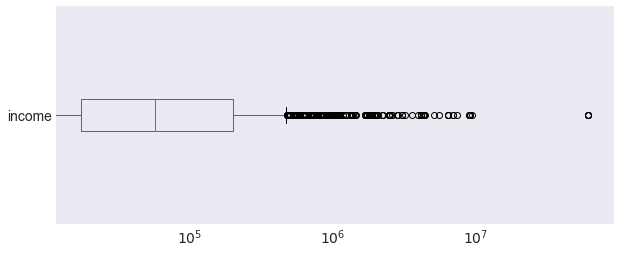

In [132]:
pd.DataFrame(g["income"]).plot(kind='box', vert=False, grid=False, figsize=(10,4), logx=True, fontsize=14)

In [133]:
g["income"].quantile([0,0.25,0.5,0.75,1])

0.00           0.0
0.25       17422.5
0.50       57664.0
0.75      200608.5
1.00    61031000.0
Name: income, dtype: float64

I've used a "log" scale for this box plot as it shows the range of sizes better - 10^5 is organisations with £100,000 income, 10^6 is £1 million and 10^7 is £10 million. It shows that most organisations are at the smaller end of the scale. The median income of an organisation is £55,000, with 25% of charities having an income of less than £17,000.

Some very large charities have been matched to grants. There are a number of possible explanations for this. They could be mismatched to an incorrect organisation, or it may be that the grant was to a local branch of a larger organisation.

Let's work out the number of charities in the data, so we can work out the percentages.

In [134]:
no_char = len(g[g["Recipient Org:Charity Number_y"].notnull()])

In [135]:
theme = ((g[['GENERAL CHARITABLE PURPOSES',
       'EDUCATION/TRAINING', 'THE ADVANCEMENT OF HEALTH OR SAVING OF LIVES',
       'DISABILITY', 'THE PREVENTION OR RELIEF OF POVERTY',
       'OVERSEAS AID/FAMINE RELIEF', 'ACCOMMODATION/HOUSING',
       'RELIGIOUS ACTIVITIES', 'ARTS/CULTURE/HERITAGE/SCIENCE',
       'AMATEUR SPORT', 'ANIMALS', 'ENVIRONMENT/CONSERVATION/HERITAGE',
       'ECONOMIC/COMMUNITY DEVELOPMENT/EMPLOYMENT',
       'ARMED FORCES/EMERGENCY SERVICE EFFICIENCY',
       'HUMAN RIGHTS/RELIGIOUS OR RACIAL HARMONY/EQUALITY OR DIVERSITY',
       'RECREATION', 'OTHER CHARITABLE PURPOSES']].sum().sort_values(ascending=False) / no_char) * 100)
theme.index = theme.index.map(str.title)
theme.map('{:,.1f}%'.format)

Education/Training                                                69.1%
Economic/Community Development/Employment                         46.1%
General Charitable Purposes                                       45.0%
Amateur Sport                                                     34.1%
Arts/Culture/Heritage/Science                                     33.3%
The Prevention Or Relief Of Poverty                               31.0%
The Advancement Of Health Or Saving Of Lives                      25.4%
Disability                                                        22.8%
Recreation                                                        19.2%
Environment/Conservation/Heritage                                 17.7%
Religious Activities                                              11.1%
Other Charitable Purposes                                          9.8%
Human Rights/Religious Or Racial Harmony/Equality Or Diversity     6.9%
Accommodation/Housing                                           

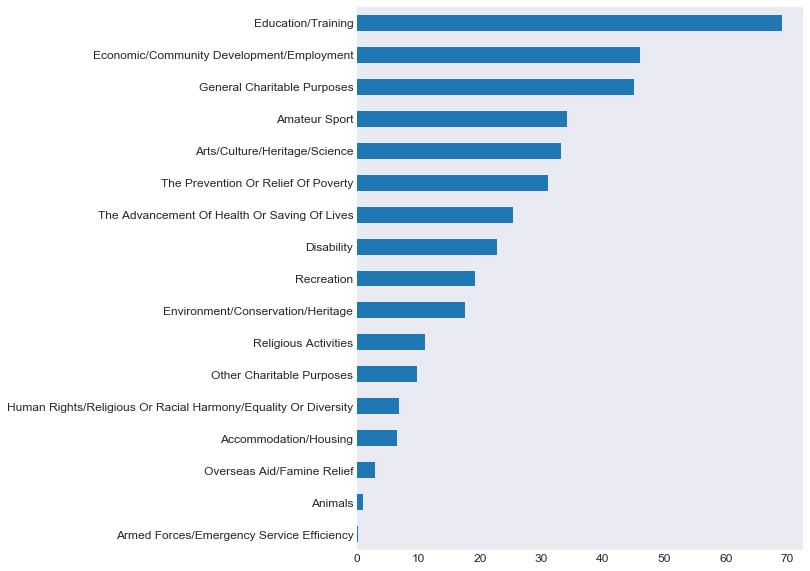

In [136]:
theme.sort_values(ascending=True).plot(kind="barh", fontsize=12, figsize=(8,10))

In [137]:
activity = ((g[['MAKES GRANTS TO INDIVIDUALS',
       'MAKES GRANTS TO ORGANISATIONS', 'PROVIDES OTHER FINANCE',
       'PROVIDES HUMAN RESOURCES', 'PROVIDES BUILDINGS/FACILITIES/OPEN SPACE',
       'PROVIDES SERVICES', 'PROVIDES ADVOCACY/ADVICE/INFORMATION',
       'SPONSORS OR UNDERTAKES RESEARCH',
       'ACTS AS AN UMBRELLA OR RESOURCE BODY', 'OTHER CHARITABLE ACTIVITIES']].sum().sort_values(ascending=False) / no_char) * 100)
activity.index = activity.index.map(str.title)
activity.map('{:,.1f}%'.format)

Provides Services                           73.4%
Provides Advocacy/Advice/Information        53.3%
Provides Buildings/Facilities/Open Space    50.0%
Provides Human Resources                    37.3%
Acts As An Umbrella Or Resource Body        16.2%
Other Charitable Activities                 15.6%
Sponsors Or Undertakes Research              8.4%
Makes Grants To Organisations                5.8%
Makes Grants To Individuals                  3.9%
Provides Other Finance                       2.3%
dtype: object

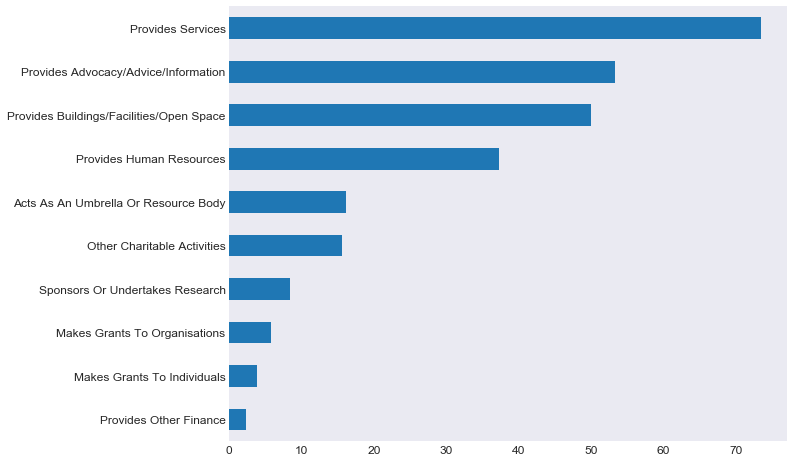

In [138]:
activity.sort_values(ascending=True).plot(kind="barh", fontsize=12, figsize=(10,8))

In [139]:
beneficiaries = ((g[['CHILDREN/YOUNG PEOPLE',
       'ELDERLY/OLD PEOPLE', 'PEOPLE WITH DISABILITIES',
       'PEOPLE OF A PARTICULAR ETHNIC OR RACIAL ORIGIN',
       'OTHER CHARITIES OR VOLUNTARY BODIES', 'OTHER DEFINED GROUPS',
       'THE GENERAL PUBLIC/MANKIND']].sum().sort_values(ascending=False) / no_char) * 100)
beneficiaries.index = beneficiaries.index.map(str.title)
beneficiaries.map('{:,.1f}%'.format)

Children/Young People                             72.4%
The General Public/Mankind                        61.4%
People With Disabilities                          47.4%
Elderly/Old People                                46.8%
Other Charities Or Voluntary Bodies               27.3%
People Of A Particular Ethnic Or Racial Origin    26.9%
Other Defined Groups                              18.8%
dtype: object

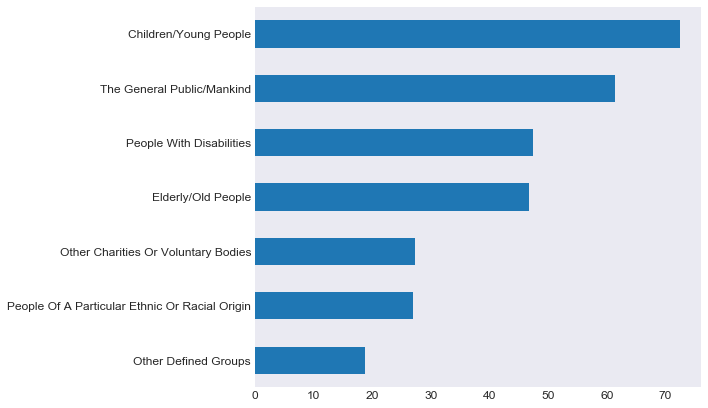

In [140]:
beneficiaries.sort_values(ascending=True).plot(kind="barh", fontsize=12, figsize=(8,7))

Save the completed dataset as a "pickle" which can be used elsewhere.

In [141]:
g.to_pickle("cf.pkl")